In [51]:
import weatherAPI
import time
from tqdm import tqdm
import weatherReturn
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:


for i in range(1, 31):
    if i < 10:
        query_date = '2023100' + str(i)
    else:
        query_date = '202310' + str(i)
    print(f"날짜: {query_date}")
    print(weatherAPI.weather_score(query_date, station_id=108))

날짜: 20231001
94.4
날짜: 20231002
93.7
날짜: 20231003
88.73
날짜: 20231004
68.35
날짜: 20231005
79.7
날짜: 20231006
84.25
날짜: 20231007
87.76
날짜: 20231008
87.01
날짜: 20231009
77.66
날짜: 20231010
87.01
날짜: 20231011
91.6
날짜: 20231012
90.29
날짜: 20231013
87.41
날짜: 20231014
55.49
날짜: 20231015
78.35
날짜: 20231016
81.45
날짜: 20231017
78.3
날짜: 20231018
82.15
날짜: 20231019
64.5
날짜: 20231020
70.27
날짜: 20231021
56.4
날짜: 20231022
70.83
날짜: 20231023
77.68
날짜: 20231024
77.2
날짜: 20231025
80.66
날짜: 20231026
82.44
날짜: 20231027
80.51
날짜: 20231028
78.54
날짜: 20231029
81.51
날짜: 20231030
78.05


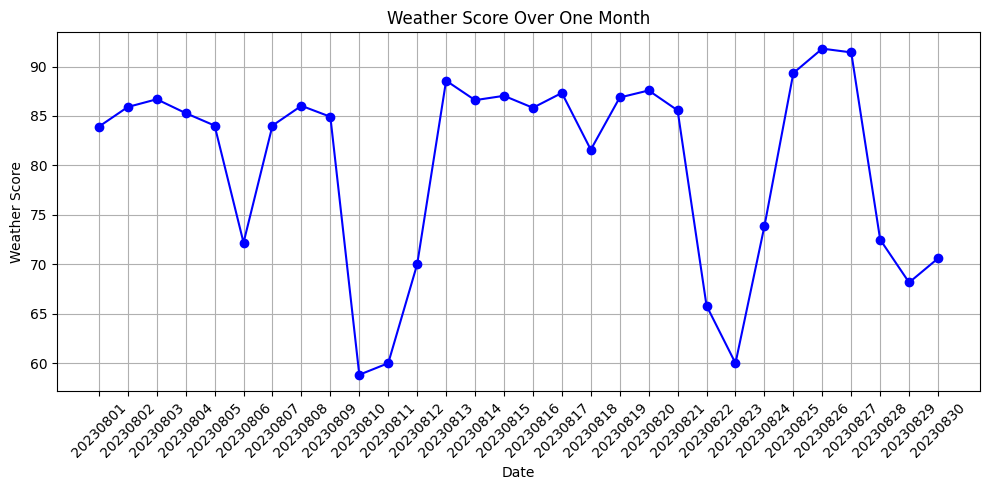

In [98]:
import matplotlib.pyplot as plt

# Initialize lists to store dates and weather scores
dates = []
weather_scores = []

# Collect data for plotting
for i in range(1, 31):
    if i < 10:
        query_date = '2023080' + str(i)
    else:
        query_date = '202308' + str(i)
    dates.append(query_date)
    weather_scores.append(weatherAPI.weather_score(query_date, station_id=108))

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(dates, weather_scores, marker='o', linestyle='-', color='b')
plt.title('Weather Score Over One Month')
plt.xlabel('Date')
plt.ylabel('Weather Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import re
from pandas.tseries.offsets import MonthEnd

# 1. 모든 CSV 파일 경로 불러오기 (파일명이 revenue_(date).csv 패턴)
file_paths = glob.glob('data/revenue/revenue_*.csv')
#file_paths = ['data/revenue_202301.csv', 'data/revenue_202302.csv','data/revenue_202303.csv']  # 예시로 직접 지정할 수도 있음


# 파일명에서 YYYYMM 날짜 추출
months = [re.search(r'revenue_(\d{6})\.csv', fp).group(1) for fp in file_paths]
months.sort()
first_month, last_month = months[0], months[-1]
# 시작일과 종료일 설정
start_date = pd.to_datetime(f"{first_month}01") + pd.Timedelta(days=5)
end_date   = pd.to_datetime(f"{last_month}01") + MonthEnd(0)


# 2. 각 파일을 읽어 리스트에 저장
dfs = []
for fp in file_paths:
    df_tmp = pd.read_csv(fp, parse_dates=['운행종료일'], dtype={'총청구요금': str})
    # 천 단위 쉼표 제거 후 숫자형 변환
    df_tmp['총청구요금'] = df_tmp['총청구요금'].str.replace(',', '').astype(float)
    dfs.append(df_tmp)

# 3. 모든 데이터프레임을 하나로 결합
df_all = pd.concat(dfs, ignore_index=True)

df_all = df_all[
    (df_all['운행종료일'] >= start_date) &
    (df_all['운행종료일'] <= end_date)
]

# 4. 일별 총청구요금 합산
grouped = (
    df_all
    .groupby('운행종료일')['총청구요금']
    .sum()
    .reset_index()
    .sort_values('운행종료일')
)

C:\Users\PPC-NB-\AppData\Local\Temp\ipykernel_7848\3435930227.py:24: DtypeWarning: Columns (10,30,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tmp = pd.read_csv(fp, parse_dates=['운행종료일'], dtype={'총청구요금': str})
C:\Users\PPC-NB-\AppData\Local\Temp\ipykernel_7848\3435930227.py:24: DtypeWarning: Columns (10,21,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tmp = pd.read_csv(fp, parse_dates=['운행종료일'], dtype={'총청구요금': str})
C:\Users\PPC-NB-\AppData\Local\Temp\ipykernel_7848\3435930227.py:24: DtypeWarning: Columns (10,21,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tmp = pd.read_csv(fp, parse_dates=['운행종료일'], dtype={'총청구요금': str})
C:\Users\PPC-NB-\AppData\Local\Temp\ipykernel_7848\3435930227.py:24: DtypeWarning: Columns (10,21,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tmp = pd.read_csv(fp, parse_dates=['운행종료일'], dtype={'총청구요금': str})
C:

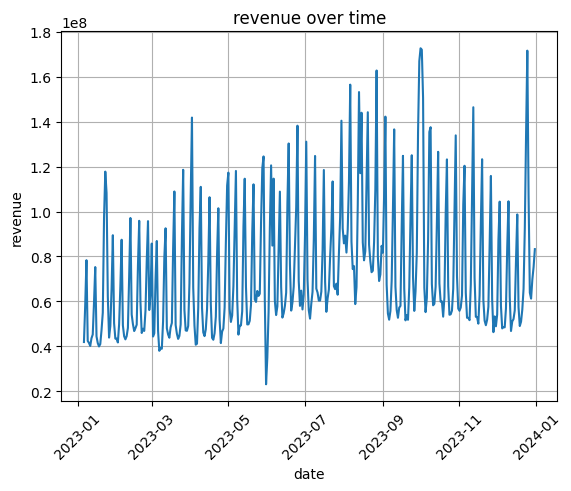

In [32]:
# Plot
plt.figure()
plt.plot(grouped['운행종료일'], grouped['총청구요금'])
plt.xlabel('date')
plt.ylabel('revenue')
plt.title('revenue over time')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [33]:
df_seoul = df_all[df_all['지역(시/도)'] == '서울특별시']

grouped_seoul = (
    df_seoul
    .groupby('운행종료일')['총청구요금']
    .sum()
    .reset_index()
    .sort_values('운행종료일')
)

In [58]:
from tqdm import tqdm
import time

weather_scores = []
dates = grouped_seoul['운행종료일'].dt.strftime('%Y%m%d').tolist()

for d in tqdm(dates, desc='Weather scores'):
    score=weatherReturn.get_weather_score_from_csv(d)
    weather_scores.append(score)

grouped_seoul['weather_score'] = weather_scores


Weather scores: 100%|██████████| 360/360 [00:00<00:00, 3314.03it/s]


C:\Users\PPC-NB-\AppData\Local\Temp\ipykernel_7848\391033360.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


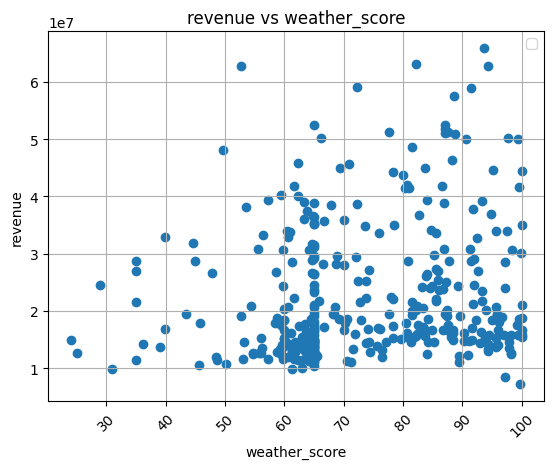

In [18]:
# Plot
plt.figure()
plt.scatter(grouped_seoul['weather_score'],grouped_seoul['총청구요금'])
plt.xlabel('weather_score')
plt.ylabel('revenue')
plt.title('revenue vs weather_score')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

In [19]:
daily_df = grouped.copy()
daily_df['운행종료일'] = pd.to_datetime(daily_df['운행종료일'], format='%Y%m%d')
daily_df = daily_df.set_index('운행종료일')

# 주별 평균 계산 (주 시작일을 월요일 기준으로)
weekly_avg = daily_df['총청구요금'].resample('W-MON').mean().reset_index()
weekly_avg['주차(YYYY-MM-DD)'] = weekly_avg['운행종료일'].dt.strftime('%Y-%m-%d')

# 컬럼 순서 재배치
weekly_avg = weekly_avg[['주차(YYYY-MM-DD)', '총청구요금']].rename(
    columns={'총청구요금': '주별_평균_총청구요금'}
)

# 결과 표시
print(weekly_avg)

   주차(YYYY-MM-DD)   주별_평균_총청구요금
0      2023-01-09  5.521635e+07
1      2023-01-16  4.991537e+07
2      2023-01-23  6.281147e+07
3      2023-01-30  6.696865e+07
4      2023-02-06  5.455377e+07
5      2023-02-13  5.753340e+07
6      2023-02-20  6.084324e+07
7      2023-02-27  6.092706e+07
8      2023-03-06  6.325991e+07
9      2023-03-13  5.529893e+07
10     2023-03-20  6.140024e+07
11     2023-03-27  6.383837e+07
12     2023-04-03  7.517285e+07
13     2023-04-10  6.415768e+07
14     2023-04-17  6.249189e+07
15     2023-04-24  6.000815e+07
16     2023-05-01  7.263655e+07
17     2023-05-08  7.145914e+07
18     2023-05-15  6.766704e+07
19     2023-05-22  6.760523e+07
20     2023-05-29  8.416556e+07
21     2023-06-05  6.735564e+07
22     2023-06-12  7.781488e+07
23     2023-06-19  7.713742e+07
24     2023-06-26  8.215347e+07
25     2023-07-03  7.604406e+07
26     2023-07-10  7.282186e+07
27     2023-07-17  7.410809e+07
28     2023-07-24  7.636329e+07
29     2023-07-31  8.692097e+07
30     2

C:\Users\PPC-NB-\AppData\Local\Temp\ipykernel_7848\897203997.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


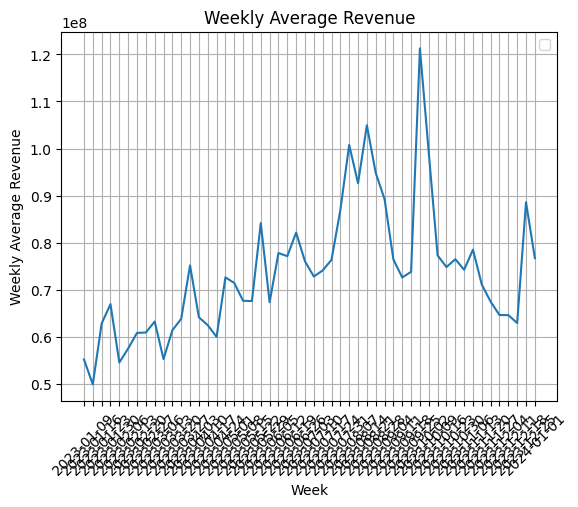

In [20]:
#plot weekly_avg
plt.figure()
plt.plot(weekly_avg['주차(YYYY-MM-DD)'], weekly_avg['주별_평균_총청구요금'])
plt.xlabel('Week')
plt.ylabel('Weekly Average Revenue')
plt.title('Weekly Average Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

In [21]:
# Create a DataFrame for weather scores and dates
weather_df = pd.DataFrame({
    '운행종료일': grouped_seoul['운행종료일'],
    'weather_score': grouped_seoul['weather_score']
})

# Set the date column as the index
weather_df.set_index('운행종료일', inplace=True)

# Resample to weekly frequency and calculate the mean
weekly_avg_weather = weather_df['weather_score'].resample('W-MON').mean().reset_index()
weekly_avg_weather['주차(YYYY-MM-DD)'] = weekly_avg_weather['운행종료일'].dt.strftime('%Y-%m-%d')

# Rearrange columns
weekly_avg_weather = weekly_avg_weather[['주차(YYYY-MM-DD)', 'weather_score']].rename(
    columns={'weather_score': '주별_평균_날씨점수'}
)

# Display the result
print(weekly_avg_weather)

   주차(YYYY-MM-DD)  주별_평균_날씨점수
0      2023-01-09   57.280000
1      2023-01-16   50.428571
2      2023-01-23   62.872857
3      2023-01-30   62.778571
4      2023-02-06   62.621429
5      2023-02-13   60.765714
6      2023-02-20   63.365714
7      2023-02-27   64.685714
8      2023-03-06   62.747143
9      2023-03-13   62.568571
10     2023-03-20   61.828571
11     2023-03-27   71.822857
12     2023-04-03   79.214286
13     2023-04-10   59.035714
14     2023-04-17   68.687143
15     2023-04-24   77.331429
16     2023-05-01   65.970000
17     2023-05-08   77.528571
18     2023-05-15   94.485714
19     2023-05-22   94.404286
20     2023-05-29   85.775714
21     2023-06-05   97.565714
22     2023-06-12   88.611429
23     2023-06-19   93.047143
24     2023-06-26   82.911429
25     2023-07-03   82.492857
26     2023-07-10   79.870000
27     2023-07-17   69.098571
28     2023-07-24   78.997143
29     2023-07-31   78.962857
30     2023-08-07   83.151429
31     2023-08-14   76.421429
32     202

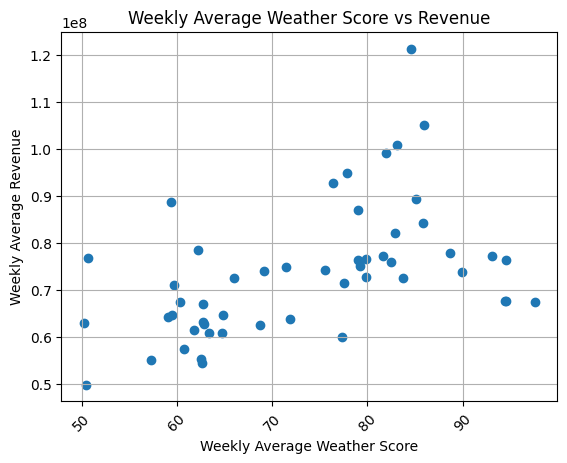

In [11]:
#plot weekly_avg_weather vs weekly_avg
plt.figure()
plt.scatter(weekly_avg_weather['주별_평균_날씨점수'], weekly_avg['주별_평균_총청구요금'])
plt.xlabel('Weekly Average Weather Score')
plt.ylabel('Weekly Average Revenue')
plt.title('Weekly Average Weather Score vs Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.show()

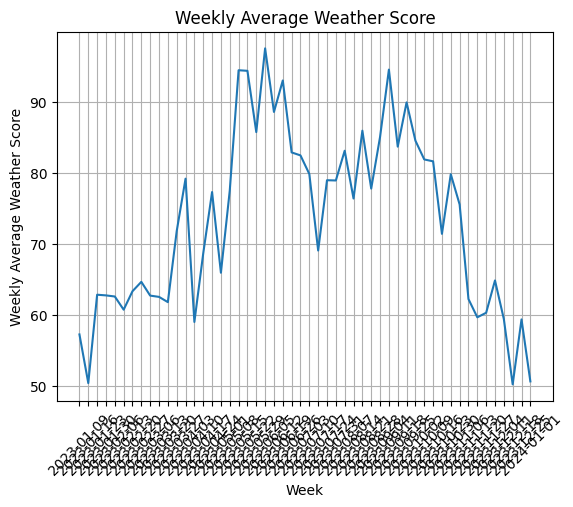

In [22]:
#plot weekly_avg_weather
plt.figure()
plt.plot(weekly_avg_weather['주차(YYYY-MM-DD)'], weekly_avg_weather['주별_평균_날씨점수'])
plt.xlabel('Week')
plt.ylabel('Weekly Average Weather Score')
plt.title('Weekly Average Weather Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [36]:
# 예시: grouped_seoul이 이미 준비되어 있다고 가정
df = grouped_seoul.copy()
df['weekday'] = df['운행종료일'].dt.weekday

# 주말/주중 평균 계산
avg_weekend = df[df['weekday'] >= 5]['총청구요금'].mean()
avg_weekday = df[df['weekday'] < 5]['총청구요금'].mean()
ratio = avg_weekend / avg_weekday

# 주말 행만 추출해 보정
weekend_adj = df[df['weekday'] >= 5].copy()
weekend_adj['총청구요금'] = weekend_adj['총청구요금'] / ratio

# 불필요 컬럼 제거
weekend_adj = weekend_adj.drop(columns=['weekday'])

# 원본과 보정된 행 합치기
combined = pd.concat([grouped_seoul, weekend_adj], ignore_index=True)

# 운행종료일 기준 정렬
combined = combined.sort_values('운행종료일').reset_index(drop=True)

print(combined)

         운행종료일         총청구요금
0   2023-01-06  1.064409e+07
1   2023-01-07  9.538476e+06
2   2023-01-07  1.906633e+07
3   2023-01-08  2.851920e+07
4   2023-01-08  1.426755e+07
..         ...           ...
459 2023-12-29  2.073902e+07
460 2023-12-30  2.450618e+07
461 2023-12-30  1.225992e+07
462 2023-12-31  2.870610e+07
463 2023-12-31  1.436105e+07

[464 rows x 2 columns]


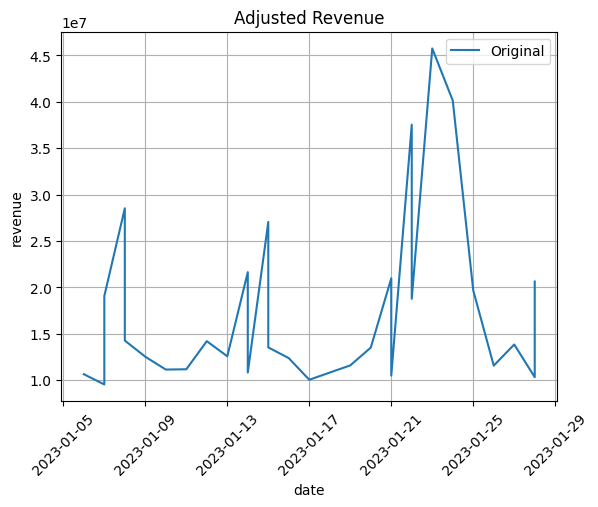

In [37]:
#plot adjusted
plt.figure()
plt.plot(combined['운행종료일'][:30], combined['총청구요금'][:30])
plt.xlabel('date')
plt.ylabel('revenue')
plt.title('Adjusted Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.legend(['Original', 'Adjusted'])
plt.show()

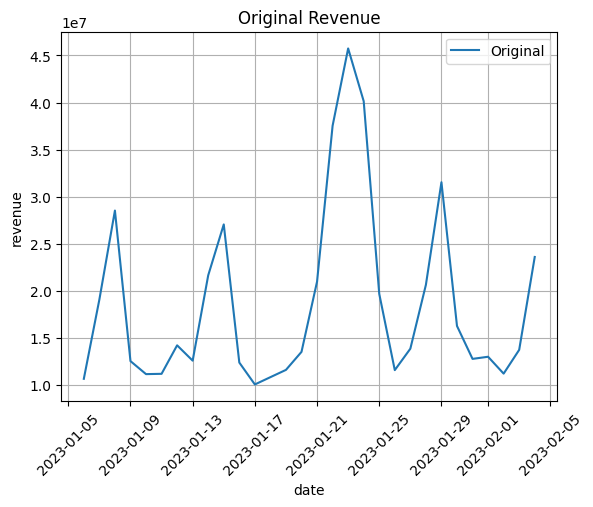

In [38]:
#plot grouped_seoul
plt.figure()
plt.plot(grouped_seoul['운행종료일'][:30], grouped_seoul['총청구요금'][:30])
plt.xlabel('date')
plt.ylabel('revenue')
plt.title('Original Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.legend(['Original'])
plt.show()

In [45]:
import pandas as pd
import glob

# 1. Load all CSV files matching pattern
file_paths = glob.glob('data/revenue/revenue_*.csv')
dfs = []
for path in file_paths:
    df = pd.read_csv(
        path,
        parse_dates=['운행종료일'],
        encoding='utf-8',
        dtype={'총청구요금': str, '지역(시/도)': str}
    )
    # rename columns to English
    df.rename(columns={
        '운행종료일': 'date',
        '총청구요금': 'revenue',
        '지역(시/도)': 'region'
    }, inplace=True)
    # remove commas and convert to float
    df['revenue'] = df['revenue'].str.replace(',', '').astype(float)
    dfs.append(df)

# 2. Concatenate all monthly data
df_all = pd.concat(dfs, ignore_index=True)

# 3. Filter for Seoul region
df_seoul = df_all[df_all['region'] == '서울특별시']

# 4. Compute daily total revenue
daily = (
    df_seoul
    .groupby('date')['revenue']
    .sum()
    .reset_index()
)

# 5. Extract weekday (0=Monday, …, 6=Sunday)
daily['weekday'] = daily['date'].dt.weekday

# 6. Compute average revenue by weekday
avg_weekday = (
    daily
    .groupby('weekday')['revenue']
    .mean()
    .reset_index()
    .sort_values('weekday')
)

# 7. Map weekday number to name
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
avg_weekday['weekday_name'] = avg_weekday['weekday'].map(weekday_map)

# Reorder columns for display
result = avg_weekday[['weekday', 'weekday_name', 'revenue']]
result.rename(columns={'weekday': 'weekday_num', 'revenue': 'avg_revenue'}, inplace=True)

C:\Users\PPC-NB-\AppData\Local\Temp\ipykernel_7848\788280374.py:8: DtypeWarning: Columns (10,30,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
C:\Users\PPC-NB-\AppData\Local\Temp\ipykernel_7848\788280374.py:8: DtypeWarning: Columns (10,21,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
C:\Users\PPC-NB-\AppData\Local\Temp\ipykernel_7848\788280374.py:8: DtypeWarning: Columns (10,21,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
C:\Users\PPC-NB-\AppData\Local\Temp\ipykernel_7848\788280374.py:8: DtypeWarning: Columns (10,21,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
C:\Users\PPC-NB-\AppData\Local\Temp\ipykernel_7848\788280374.py:8: DtypeWarning: Columns (10,21,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
C:\Users\PPC-NB-\AppData

In [46]:
print(result)

   weekday_num weekday_name   avg_revenue
0            0          Mon  2.351097e+07
1            1          Tue  1.733035e+07
2            2          Wed  1.506284e+07
3            3          Thu  1.476844e+07
4            4          Fri  1.752443e+07
5            5          Sat  2.983105e+07
6            6          Sun  4.096782e+07


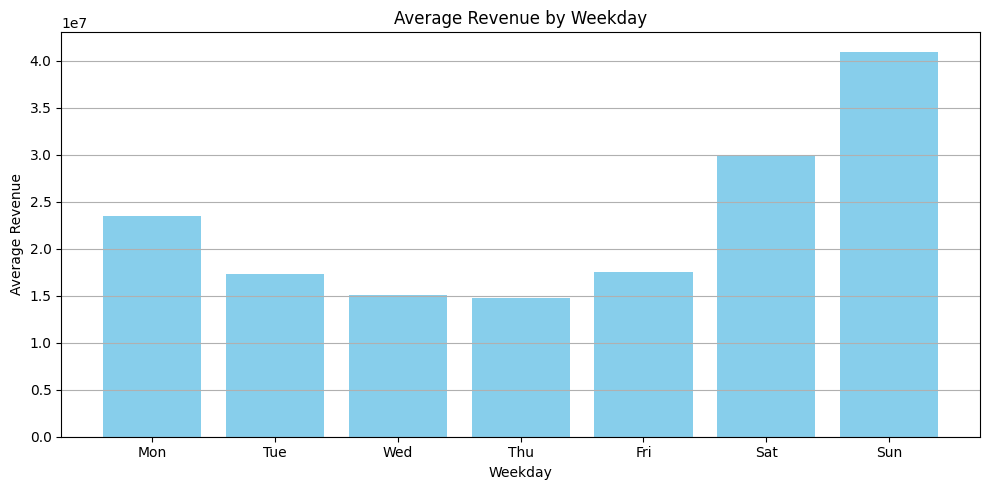

In [48]:
#plot result
plt.figure(figsize=(10, 5))
plt.bar(result['weekday_name'], result['avg_revenue'], color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Weekday')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
ratios = []
for i in range(7):
    ratio= avg_weekday['revenue'][i] / avg_weekday['revenue'][0]
    ratios.append(ratio)

print(ratios)

[np.float64(1.0), np.float64(0.7371174584195893), np.float64(0.6406729187857081), np.float64(0.6281511877298389), np.float64(0.7453723601601223), np.float64(1.2688143615038412), np.float64(1.7424983881890461)]


In [52]:
# 1. Load all CSV files matching pattern
file_paths = glob.glob('data/revenue/revenue_*.csv')
dfs = []
for path in file_paths:
    df = pd.read_csv(
        path,
        parse_dates=['운행종료일'],
        encoding='utf-8',
        dtype={'총청구요금': str, '지역(시/도)': str}
    )
    # rename columns to English
    df.rename(columns={
        '운행종료일': 'date',
        '총청구요금': 'revenue',
        '지역(시/도)': 'region'
    }, inplace=True)
    # remove commas and convert to float
    df['revenue'] = df['revenue'].str.replace(',', '').astype(float)
    dfs.append(df)

# 2. Concatenate all monthly data
df_all = pd.concat(dfs, ignore_index=True)

# 3. Filter for Seoul region
df_seoul = df_all[df_all['region'] == '서울특별시']

# 4. Compute daily total revenue
daily = (
    df_seoul
    .groupby('date')['revenue']
    .sum()
    .reset_index()
)

In [ ]:
# Add a column for adjusted revenue based on weekday ratios
grouped_seoul['adjusted_revenue'] = grouped_seoul.apply(
    lambda row: row['총청구요금'] / ratios[row['운행종료일'].weekday()], axis=1
)

# Display the updated DataFrame
print(grouped_seoul[['운행종료일', '총청구요금', 'adjusted_revenue']])

         운행종료일       총청구요금  adjusted_revenue
0   2023-01-06  10644092.0      1.428023e+07
1   2023-01-07  19066328.0      1.502689e+07
2   2023-01-08  28519204.0      1.636685e+07
3   2023-01-09  12525843.0      1.252584e+07
4   2023-01-10  11142635.0      1.511650e+07
..         ...         ...               ...
355 2023-12-27  17828781.0      2.782821e+07
356 2023-12-28  16172704.0      2.574652e+07
357 2023-12-29  20739016.0      2.782370e+07
358 2023-12-30  24506184.0      1.931424e+07
359 2023-12-31  28706103.0      1.647411e+07

[360 rows x 3 columns]


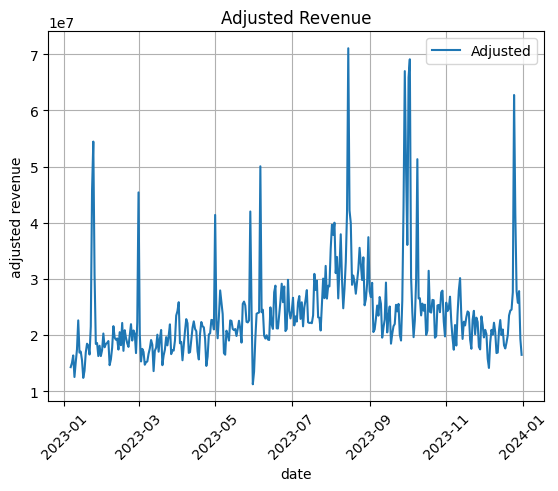

In [60]:
#plot adjusted
plt.figure()
plt.plot(grouped_seoul['운행종료일'], grouped_seoul['adjusted_revenue'])
plt.xlabel('date')
plt.ylabel('adjusted revenue')
plt.title('Adjusted Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.legend(['Adjusted'])
plt.show()

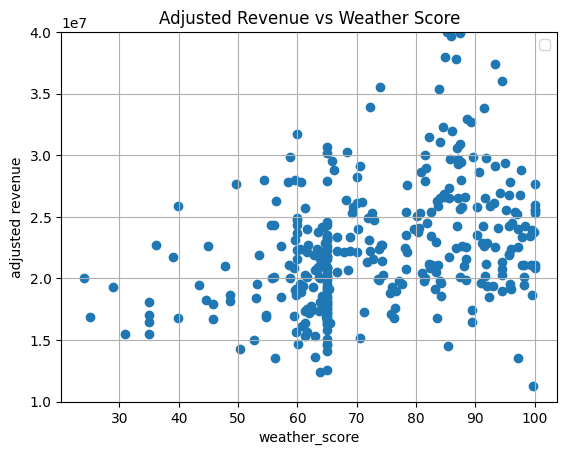

In [68]:
#plot adjusted vs weather_score
plt.figure()
plt.scatter(grouped_seoul['weather_score'], grouped_seoul['adjusted_revenue'])
plt.xlabel('weather_score')
plt.ylabel('adjusted revenue')
plt.title('Adjusted Revenue vs Weather Score')

plt.grid()
plt.legend()
plt.ylim(1e7, 4e7)
plt.show()

In [69]:
# 1) 연간·일간 성장률 정의
annual_growth = 0.0395 * 4            # 연간 성장률 (예: 0.158)
daily_growth  = annual_growth / 365  # 일간 성장률

# 2) 기준일(가장 이른 날짜) 찾기
start_date = daily['date'].min()

# 3) 기준일로부터 경과 일수 계산
daily['days_since_start'] = (daily['date'] - start_date).dt.days

# 4) 누적 성장 요인 계산: (1 + g_daily)^(days_since_start)
daily['growth_factor'] = (1 + daily_growth) ** daily['days_since_start']

# 5) 성장 보정된 매출 컬럼 추가
daily['revenue_detrended'] = daily['revenue'] / daily['growth_factor']

In [70]:
grouped_seoul['growth_factor'] = (1 + daily_growth) ** ((grouped_seoul['운행종료일'] - start_date).dt.days)
grouped_seoul['revenue_detrended'] = grouped_seoul['adjusted_revenue'] / grouped_seoul['growth_factor']
print(grouped_seoul[['운행종료일', 'adjusted_revenue', 'growth_factor', 'revenue_detrended']])

         운행종료일  adjusted_revenue  growth_factor  revenue_detrended
0   2023-01-06      1.428023e+07       1.002166       1.424937e+07
1   2023-01-07      1.502689e+07       1.002600       1.498792e+07
2   2023-01-08      1.636685e+07       1.003034       1.631734e+07
3   2023-01-09      1.252584e+07       1.003468       1.248255e+07
4   2023-01-10      1.511650e+07       1.003903       1.505773e+07
..         ...               ...            ...                ...
355 2023-12-27      2.782821e+07       1.168595       2.381340e+07
356 2023-12-28      2.574652e+07       1.169101       2.202250e+07
357 2023-12-29      2.782370e+07       1.169607       2.378894e+07
358 2023-12-30      1.931424e+07       1.170113       1.650630e+07
359 2023-12-31      1.647411e+07       1.170619       1.407298e+07

[360 rows x 4 columns]


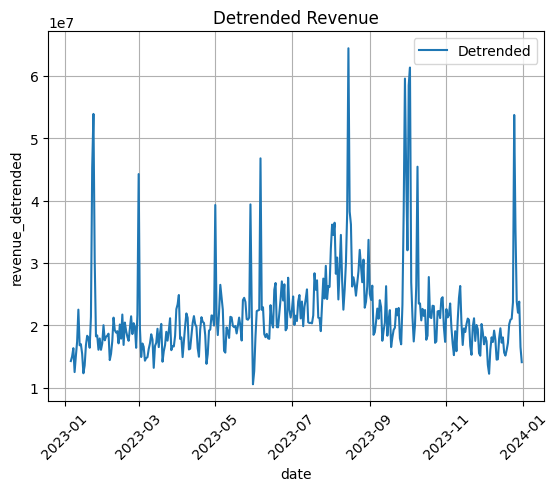

In [71]:
#plot adjusted
plt.figure()
plt.plot(grouped_seoul['운행종료일'], grouped_seoul['revenue_detrended'])
plt.xlabel('date')
plt.ylabel('revenue_detrended')
plt.title('Detrended Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.legend(['Detrended'])
plt.show()

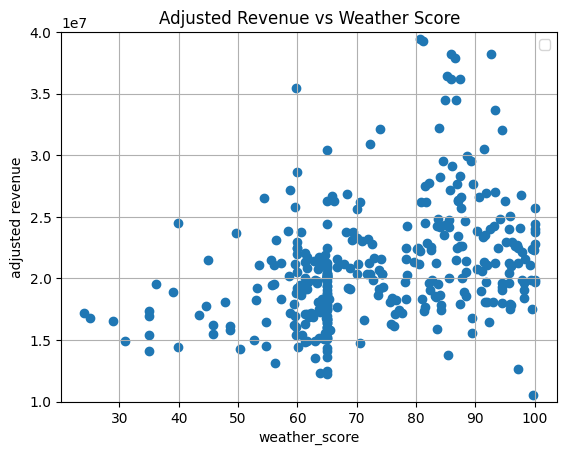

In [141]:
#plot adjusted vs weather_score
plt.figure()
plt.scatter(grouped_seoul['weather_score'], grouped_seoul['revenue_detrended'])
plt.xlabel('weather_score')
plt.ylabel('adjusted revenue')
plt.title('Adjusted Revenue vs Weather Score')

plt.grid()
plt.legend()
plt.ylim(1e7, 4e7)
# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [77]:
import pandas as pd
df_holidays = pd.read_feather('data/2023~2025년_휴일_데이터_38rows.feather')

In [80]:
print(df_holidays)

         date        holiday_name
0  2023-01-01                  신정
1  2023-01-21                  설날
2  2023-01-22                  설날
3  2023-01-23                  설날
4  2023-01-24               대체공휴일
5  2023-03-01                 삼일절
6  2023-05-05                어린이날
7  2023-05-27              부처님오신날
8  2023-05-29               대체공휴일
9  2023-06-06                 현충일
10 2023-08-15                 광복절
11 2023-09-28                  추석
12 2023-09-29                  추석
13 2023-09-30                  추석
14 2023-10-02               임시공휴일
15 2023-10-03                 개천절
16 2023-10-09                 한글날
17 2023-12-25                 성탄절
18 2025-01-01                  신정
19 2025-01-27               임시공휴일
20 2025-01-28                  설날
21 2025-01-29                  설날
22 2025-01-30                  설날
23 2025-03-01                 삼일절
24 2025-03-03               대체공휴일
25 2025-05-05                어린이날
26 2025-05-05              부처님오신날
27 2025-05-06               대체공휴일
28 2025-06-03 

In [78]:

# 1. Prepare holiday DataFrame
df_holidays = df_holidays.rename(columns={'일자':'date', '휴일명':'holiday_name'})
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

# 2. Compute normal-day average revenue (exclude holiday dates)
normal_avg = daily.loc[~daily['date'].isin(df_holidays['date']), 'revenue'].mean()

# 3. Extract holiday revenues by merging
holiday_df = daily.merge(df_holidays, on='date', how='inner')

# 4. Add normal average and ratio columns
holiday_df['normal_avg'] = normal_avg
holiday_df['ratio'] = (holiday_df['revenue'] / holiday_df['normal_avg']).round(2)

# 5. Select and display the result
result = holiday_df[['date', 'holiday_name', 'revenue', 'normal_avg', 'ratio']]

In [79]:
print(result)

         date holiday_name     revenue  normal_avg  ratio
0  2023-01-01           신정  15474140.0  21763958.0   0.71
1  2023-01-21           설날  20971256.0  21763958.0   0.96
2  2023-01-22           설날  37530278.0  21763958.0   1.72
3  2023-01-23           설날  45743974.0  21763958.0   2.10
4  2023-01-24        대체공휴일  40139561.0  21763958.0   1.84
5  2023-03-01          삼일절  29088974.0  21763958.0   1.34
6  2023-05-05         어린이날  20830859.0  21763958.0   0.96
7  2023-05-27       부처님오신날  28226109.0  21763958.0   1.30
8  2023-05-29        대체공휴일  42004008.0  21763958.0   1.93
9  2023-06-06          현충일  36895364.0  21763958.0   1.70
10 2023-08-15          광복절  52390821.0  21763958.0   2.41
11 2023-09-28           추석  26971234.0  21763958.0   1.24
12 2023-09-29           추석  49945218.0  21763958.0   2.29
13 2023-09-30           추석  63172264.0  21763958.0   2.90
14 2023-10-02        임시공휴일  65873465.0  21763958.0   3.03
15 2023-10-03          개천절  50945606.0  21763958.0   2.34
16 2023-10-09 

In [134]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

# 2) Flag weekend, holiday, offday
daily['weekday']    = daily['date'].dt.weekday
daily['is_weekend'] = daily['weekday'] >= 5
daily['is_holiday'] = daily['date'].isin(df_holidays['date'])
daily['is_offday']  = daily['is_holiday'] | daily['is_weekend']

# 3) Identify continuous blocks of offdays vs on-days
daily['block_id']   = (daily['is_offday'] != daily['is_offday'].shift(1)).cumsum()

# 4) Compute offday-run length per block
daily['offday_run'] = daily.groupby('block_id')['is_offday'].transform('sum')

# 5) Zero out runs for non-offday rows
daily['offday_run'] = daily['offday_run'].where(daily['is_offday'], 0)

# 6) (Optional) Drop helper columns
daily = daily.drop(columns=['weekday','is_weekend','is_holiday','is_offday','block_id'])

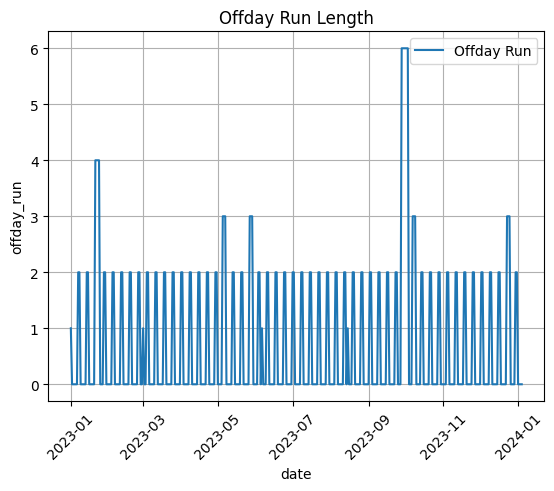

In [135]:
#plot offday_run
plt.figure()
plt.plot(daily['date'], daily['offday_run'])
plt.xlabel('date')
plt.ylabel('offday_run')
plt.title('Offday Run Length')
plt.xticks(rotation=45)
plt.grid()
plt.legend(['Offday Run'])
plt.show()

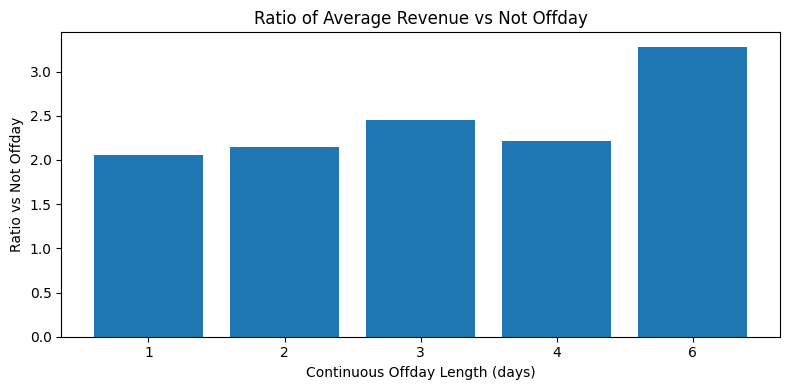

In [136]:
# 1) Compute summary statistics by offday_run
summary = (
    daily
    .groupby('offday_run')['revenue']
    .agg(
        avg_revenue='mean',    # average daily revenue
        total_revenue='sum',   # total revenue
        days_count='count'     # number of days
    )
    .reset_index()
)

# 2) Calculate normal (offday_run=0) average for ratio baseline
normal_avg = summary.loc[summary['offday_run'] == 0, 'avg_revenue'].values[0]

# 3) Add ratio vs not offday
summary['ratio_vs_not_offday'] = (summary['avg_revenue'] / normal_avg).round(2)



# 5) Optionally, plot ratio
plt.figure(figsize=(8, 4))
plt.bar(summary['offday_run'].astype(str)[1:], summary['ratio_vs_not_offday'][1:])
plt.xlabel('Continuous Offday Length (days)')
plt.ylabel('Ratio vs Not Offday')
plt.title('Ratio of Average Revenue vs Not Offday')
plt.tight_layout()
plt.show()

In [137]:
print(summary.loc[summary['offday_run'] == 0, 'avg_revenue'])

0    1.626300e+07
Name: avg_revenue, dtype: float64


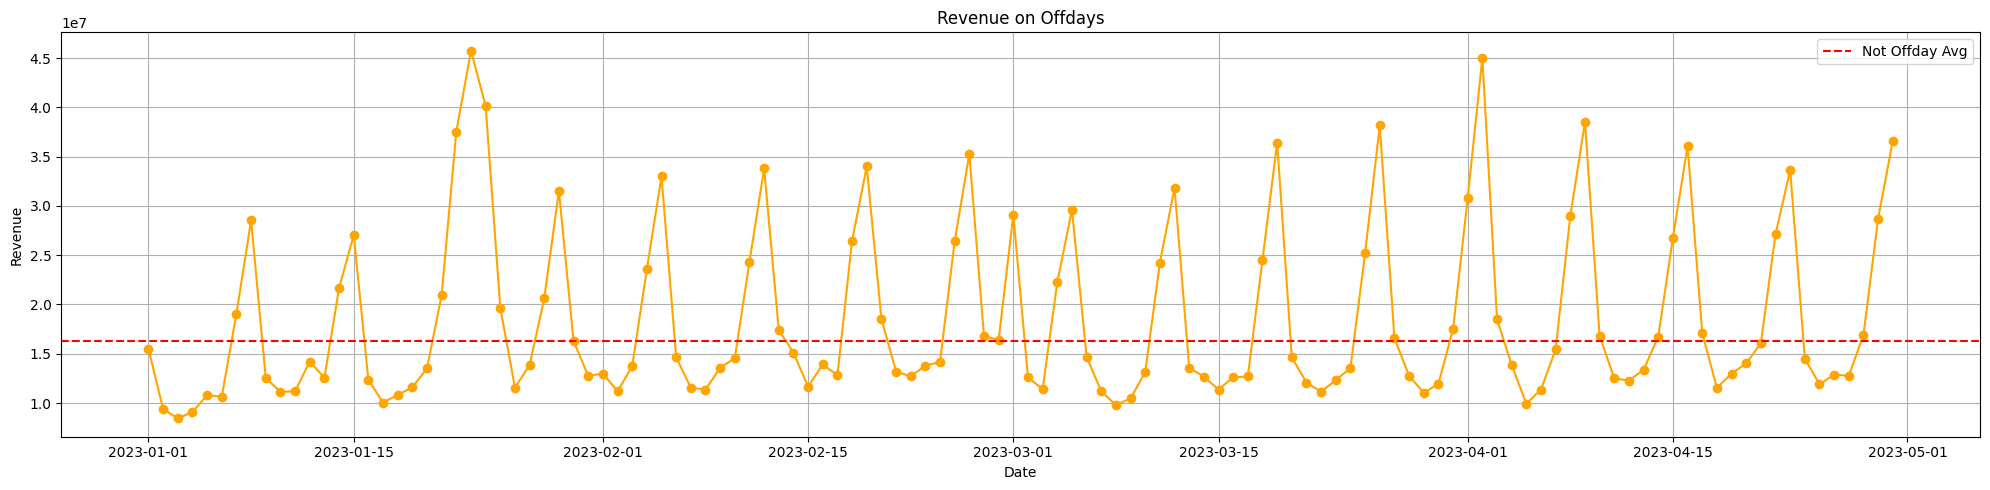

In [144]:
# Filter for offdays
offday_data = daily[daily['offday_run'] > -1]


# Plot revenue for offdays
plt.figure(figsize=(20, 5))
plt.plot(offday_data['date'][:120], offday_data['revenue'][:120], marker='o', linestyle='-', color='orange')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue on Offdays')
# Calculate the average revenue for not offdays
not_offday_avg = daily[daily['offday_run'] == 0]['revenue'].mean()

# Add a horizontal line for the average revenue of not offdays
plt.axhline(y=not_offday_avg, color='red', linestyle='--', label='Not Offday Avg')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.yscale('log')
plt.show()

In [102]:
# Filter holidays that are not on weekends
weekday_holidays = holiday_df[~holiday_df['date'].dt.weekday.isin([5, 6])]

# Calculate the total revenue for holidays (excluding weekends)
total_weekday_holiday_revenue = weekday_holidays['revenue'].mean()

# Display the result
print(f"Total revenue for holidays (excluding weekends): {total_weekday_holiday_revenue}")

Total revenue for holidays (excluding weekends): 44223377.0


In [ ]:
# Assuming `precipitation_df` contains precipitation data with a 'date' column
# Merge precipitation data with revenue data
merged_df = daily.merge(precipitation_df, on='date', how='inner')

# Plot precipitation vs revenue
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['precipitation'], merged_df['revenue'], alpha=0.7, color='blue')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Revenue')
plt.title('Precipitation vs Revenue')
plt.grid()
plt.show()